<a href="https://colab.research.google.com/github/avssenna/kaggle_explorations/blob/master/Tugas_Eksplorasi_Machine_Learning_Boston_Housing_price_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tugas Eksplorasi Machine Learning**

Avisena **119110015**

Dalam membuat machine learning linear regression dengan dataset Boston Housing Price, perlu dilakukan sebagai berikut :
# 1.   **Pemanggilan dataset melalui modul sklearn**





In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
boston

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

#2.   **Membuat data frame untuk features dan target**



## Membuat DataFrame dengan Modul pandas

In [ ]:
import pandas as pd 

Xtr_df = pd.DataFrame(boston.data, columns=boston.feature_names)
ytr_df = pd.DataFrame(boston.target)

In [ ]:
Xtr_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
ytr_df

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


## Menjabarkan infromasi DataSet

Fungsi Describe dan info untuk menginformasikan DataSet secara statistik

In [ ]:
Xtr_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [ ]:
Xtr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [ ]:
ytr_df.describe()

,0
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [ ]:
ytr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


setelah dipastikan jika tidak terdapat instance yang berisi data kosong/ nul

## Explore Data dan Analisa

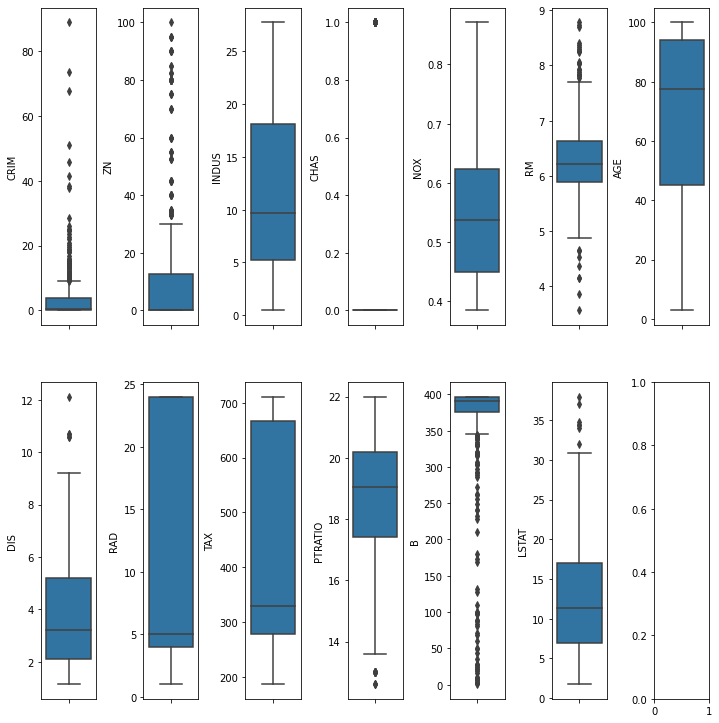

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(10,10))
index = 0
ax = ax.flatten()

for col, value in Xtr_df.items():
    sns.boxplot(y=col, data=Xtr_df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

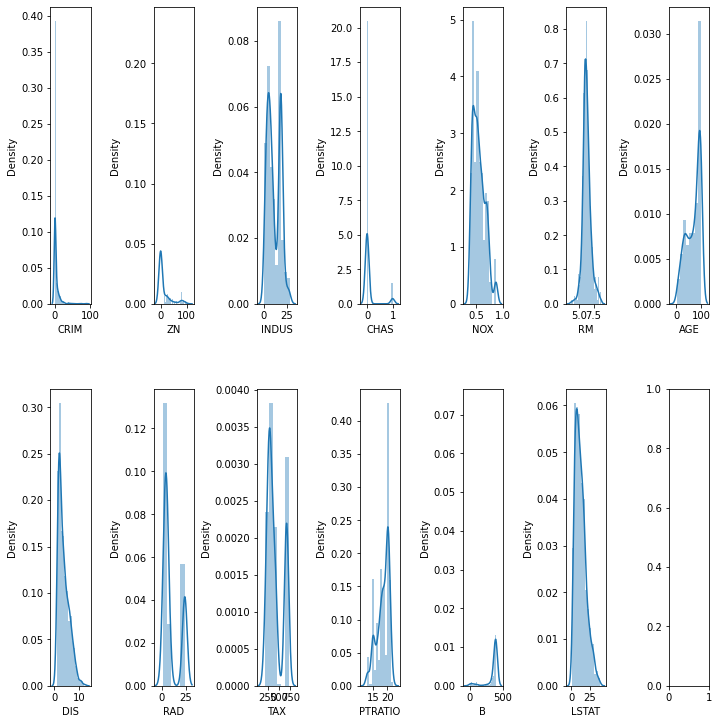

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(10,10))
index = 0
ax = ax.flatten()

for col, value in Xtr_df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

# 3. **Menggabungkan DataFrame Features dan Target**

In [ ]:
bhp_df = pd.merge( Xtr_df, ytr_df, left_index=True, right_index=True)
bhp_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Melihat korelasi Data antara target dengan masing-masing features

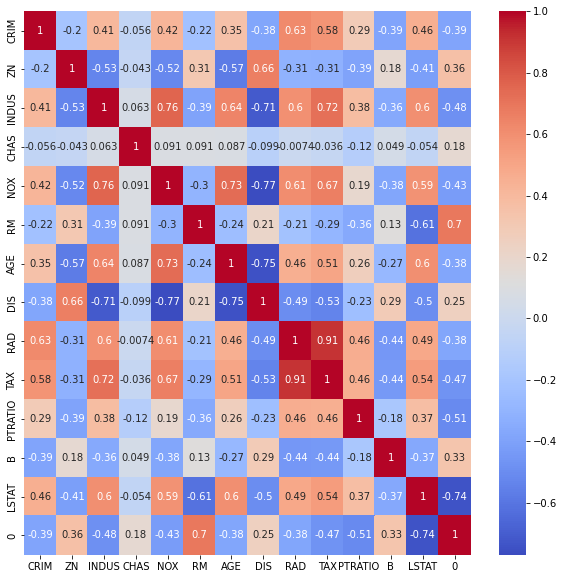

In [ ]:
corr = bhp_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

Melalui Matriks diatas, dilihat bahwa :
*  Targer berkorelasi dengan LSTAT (% status populasi yang lebih rendah)
*  Target berkorelasi dengan RM (rata-rata jumlah kamar per hunian)




# 4. **Membagi DataSet untuk model**

Dalam kasus ini, telah diketahui bahwa Harga berkorelasi dengan RM (rata-rata jumlah kamar per hunian). Maka :
*   Kita harus mendefinisikan Features dan target untuk dimodelkan



## Membuat model DataSet Harga versus Status Populasi

In [ ]:
x = bhp_df['LSTAT'].values.reshape(-1,1)
y = ytr_df

In [ ]:
x.shape

(506, 1)

In [ ]:
y.shape

(506, 1)

## Memvisualisasikan DataSet Harga versus Status Populasi

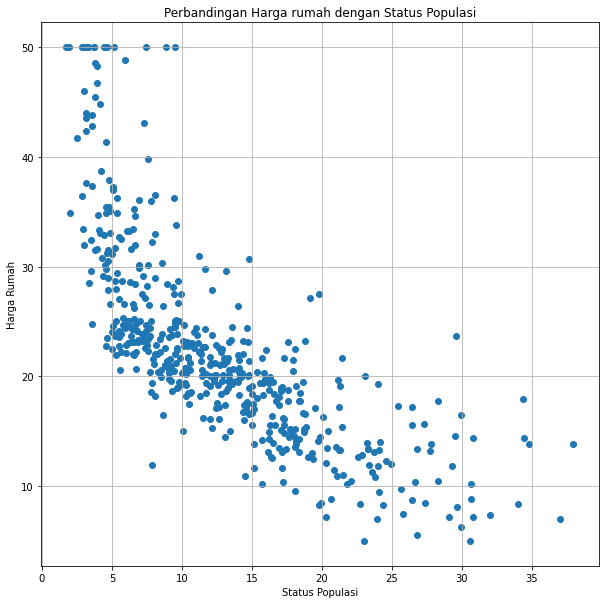

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x,y)

plt.title('Perbandingan Harga rumah dengan Status Populasi')
plt.xlabel('Status Populasi')
plt.ylabel('Harga Rumah')
plt.grid(True)
plt.show()

# 5. **Membangun Model**

Dalam membangun model regressi, kita memakai modul yang tersedia

## Memanggil Model Linear Regression

In [ ]:
from sklearn import linear_model

model = linear_model.LinearRegression()

## Melakukan Split DataSet

In [ ]:
from sklearn.model_selection import train_test_split

Membagi DataSet menjadi 70% Data Training dan 30% Data Test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3,      #membagi 30% untuk data test
                                                    random_state = 1)

print(f'X_train : {X_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_train : {y_train.shape}')
print(f'y_test : {y_test.shape}')

X_train : (354, 1)
X_test : (152, 1)
y_train : (354, 1)
y_test : (152, 1)


## Fitting model dengan DataSet

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

## Memvisualisasikan Model

In [ ]:
y_prediksi = model.predict(x_test)

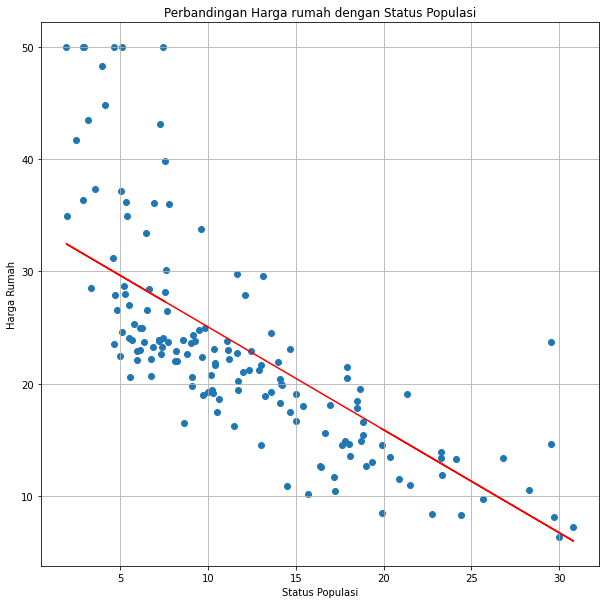

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.title('Perbandingan Harga rumah dengan Status Populasi')
plt.xlabel('Status Populasi')
plt.ylabel('Harga Rumah')
plt.grid(True)
plt.show()

## Mengetahui nilai koefisien Regressi dan Intercept

In [ ]:
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')

intercept: [34.22183685]
slope: [[-0.9166916]]


## Evaluasi LRM 

In [ ]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_prediksi)

print(f'R-squares: {r_squared}')

R-squares: 0.5349901044757204


# 6. **Prediksi Harga Rumah**

Misalkan kita akan memprediksi harga rumah untuk presentasi status populasi :

*   10%
*   20%
*   30%
* 40%
* 50%





In [ ]:
import numpy as np
status_populasi = np.array([10,20,30,40,50]).reshape(-1,1)
status_populasi

array([[10],
       [20],
       [30],
       [40],
       [50]])

In [ ]:
prediksi_harga = model.predict(status_populasi)

In [ ]:
for stat, hrg in zip(status_populasi, prediksi_harga):
    print(f'Status Populasi: {stat}%  prediksi harga: {hrg}')

Status Populasi: [10]%  prediksi harga: [25.05492084]
Status Populasi: [20]%  prediksi harga: [15.88800483]
Status Populasi: [30]%  prediksi harga: [6.72108882]
Status Populasi: [40]%  prediksi harga: [-2.4458272]
Status Populasi: [50]%  prediksi harga: [-11.61274321]
